<a href="https://colab.research.google.com/github/FlavioGermanoPinheiro/unsupervised-learning/blob/main/Exerc%C3%ADcio_2_Clusteriza%C3%A7%C3%A3o_Hier%C3%A1rquica_Fl%C3%A1vio_Germano_Pinheiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tarefa 1:

import numpy as np

class HierarchicalClustering:
    def __init__(self, linkage='single'):
      # Inicializa o algoritmo de clusterização hierárquica - linkage: 'single', 'complete' ou 'average'.
        self.linkage = linkage
        self.merge_history = []
        self.distances = []

    def _calculo_da_distancia_matrix(self, X):
        # Calcula a matriz de distâncias entre todos os pares de pontos:
        n = len(X)
        dist_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(i + 1, n):
                dist = np.linalg.norm(X[i] - X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist
        return dist_matrix

    def _cluster_distancia (self, cluster1, cluster2, X, dist_matrix):
        # Calcula a distância entre dois clusters segundo o critério de ligação:
        if self.linkage == 'single':
            # Menor distância entre qualquer par de pontos
            return np.min([dist_matrix[i, j] for i in cluster1 for j in cluster2])

        elif self.linkage == 'complete':
            # Maior distância entre qualquer par de pontos:
            return np.max([dist_matrix[i, j] for i in cluster1 for j in cluster2])

        elif self.linkage == 'average':
            # Média das distâncias entre todos os pares de pontos:
            return np.mean([dist_matrix[i, j] for i in cluster1 for j in cluster2])

    def fit(self, X):
        # Executa a clusterização hierárquica aglomerativa:
        n = len(X)
        clusters = [[i] for i in range(n)]
        dist_matrix = self._calculo_da_distancia_matrix(X)
        self.merge_history = []
        self. distancias = []

        step = 0
        print(f"Passo inicial: {len(clusters)} clusters individuais\n")

        while len(clusters) > 1:
            min_distancia = float('inf')
            merge_i, merge_j = -1, -1

            # Encontrar par de clusters mais próximos:
            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    distancia = self._cluster_distancia(clusters[i], clusters[j], X, dist_matrix)
                    if distancia < min_distancia:
                        min_distancia = distancia
                        merge_i, merge_j = i, j

            # Combinar clusters:
            new_cluster = clusters[merge_i] + clusters[merge_j]
            self.merge_history.append((clusters[merge_i].copy(), clusters[merge_j].copy()))
            self.distancias.append(min_distancia)
            step += 1

            print(f"Passo {step}: Combinar {clusters[merge_i]} e {clusters[merge_j]} (distância={min_distancia:.2f})")

            # Atualizar lista de clusters:
            clusters = [clusters[k] for k in range(len(clusters)) if k not in [merge_i, merge_j]]
            clusters.append(new_cluster)

        print("\nClusterização completa")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simples:
X_simple = np.array([[1, 2], [1.5, 1.8], [5, 8],
                     [8, 8], [1, 0.6], [9, 11]])

# Teste dos métodos de ligação (Roda o algoritmo três vezes, cada vez usando um critério de ligação diferente, para comparar o efeito de cada abordagem nos mesmos dados)
# Testar cada método
metodos = ['single', 'complete', 'average']

for metodo in metodos:
    print("="*60)
    print(f"🔹 Teste com método: {metodo.upper()} LINKAGE")
    hc = HierarchicalClustering(linkage=metodo)
    hc.fit(X_simple)


🔹 Teste com método: SINGLE LINKAGE
Passo inicial: 6 clusters individuais

Passo 1: Combinar [0] e [1] (distância=0.54)
Passo 2: Combinar [4] e [0, 1] (distância=1.30)
Passo 3: Combinar [2] e [3] (distância=3.00)
Passo 4: Combinar [5] e [2, 3] (distância=3.16)
Passo 5: Combinar [4, 0, 1] e [5, 2, 3] (distância=7.12)

Clusterização completa!
🔹 Teste com método: COMPLETE LINKAGE
Passo inicial: 6 clusters individuais

Passo 1: Combinar [0] e [1] (distância=0.54)
Passo 2: Combinar [4] e [0, 1] (distância=1.40)
Passo 3: Combinar [2] e [3] (distância=3.00)
Passo 4: Combinar [5] e [2, 3] (distância=5.00)
Passo 5: Combinar [4, 0, 1] e [5, 2, 3] (distância=13.12)

Clusterização completa!
🔹 Teste com método: AVERAGE LINKAGE
Passo inicial: 6 clusters individuais

Passo 1: Combinar [0] e [1] (distância=0.54)
Passo 2: Combinar [4] e [0, 1] (distância=1.35)
Passo 3: Combinar [2] e [3] (distância=3.00)
Passo 4: Combinar [5] e [2, 3] (distância=4.08)
Passo 5: Combinar [4, 0, 1] e [5, 2, 3] (distância=9

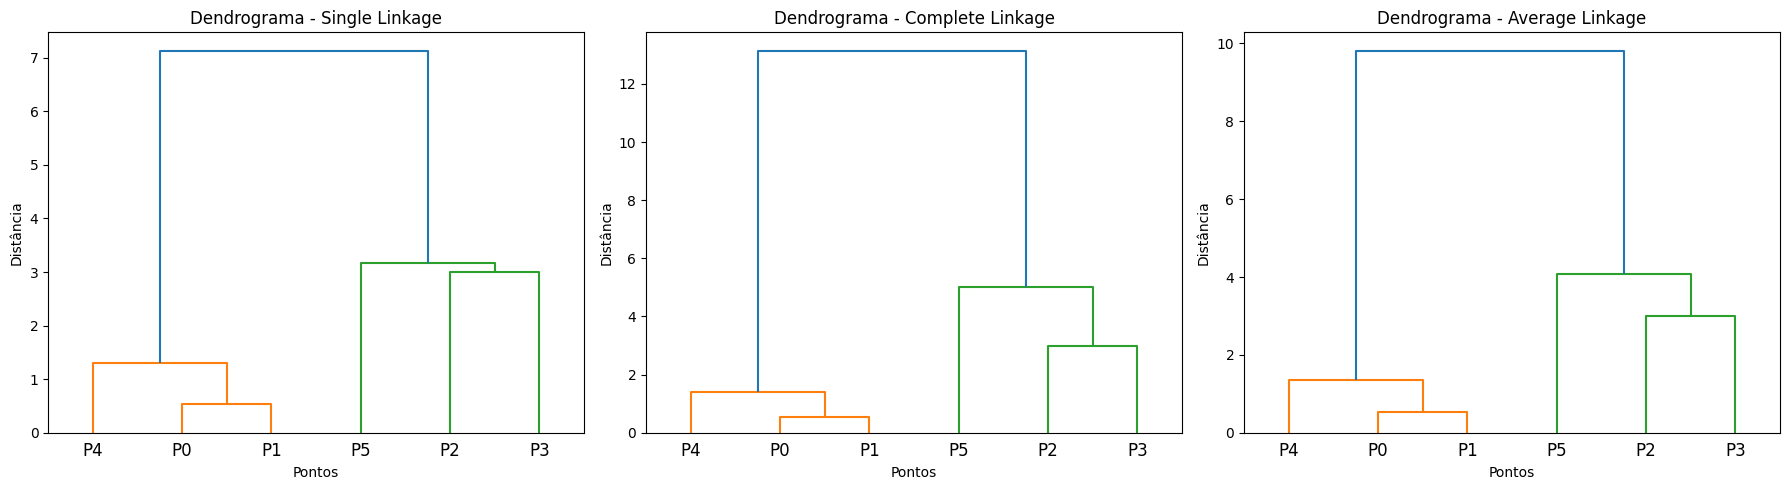

In [ ]:
# Para melhor compreensão
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_metodos = ['single', 'complete', 'average']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metodo in enumerate(linkage_metodos):
    linkage_matrix = linkage(X_simple, method=metodo)
    dendrogram(linkage_matrix, ax=axes[i], labels=[f'P{j}' for j in range(len(X_simple))])
    axes[i].set_title(f'Dendrograma - {metodo.capitalize()} Linkage')
    axes[i].set_xlabel('Pontos')
    axes[i].set_ylabel('Distância')

plt.tight_layout()
plt.show()


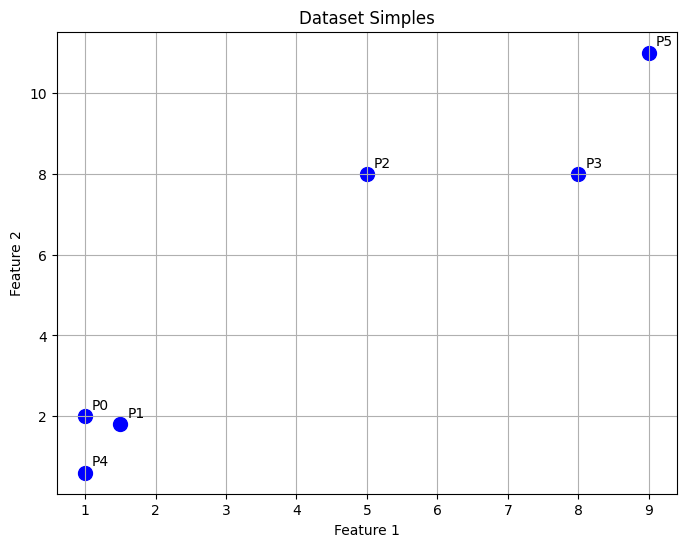

In [ ]:
# No Dataset X-simple

import numpy as np
import matplotlib.pyplot as plt

# Dataset simples:
X_simple = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

# Visualizar os pontos:
plt.figure(figsize=(8,6))
plt.scatter(X_simple[:,0], X_simple[:,1], c='blue', s=100)
for i, (x, y) in enumerate(X_simple):
    plt.annotate(f"P{i}", (x, y), xytext=(5,5), textcoords='offset points')
plt.title("Dataset Simples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [ ]:
# Resposta da Tarefa 1:
# Comparação de resultados:
#    O Single linkage, que utiliza  a menor distância entre dois clusters, forma clusters longos e conectados.
#    O Complete linkages, que utiliza a maior distância entre dois clusters, produz clusters mais alongados e esféricos.
#    O Avarage linkage fornece resultados mais equilibrados e produz clusters intermediários.

In [ ]:
# Tarefa 2:

In [ ]:
# 2.1 Carregue o dataset Wine e explore suas features:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

# Carregar dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Dataset Wine:")
print(f"Shape: {X_wine.shape}")
print(f"Features: {wine.feature_names}")
print(f"Classes: {wine.target_names}")

# Criar DataFrame para análise
df_wine = pd.DataFrame(X_wine, columns=wine.feature_names)
df_wine['target'] = y_wine

# Estatísticas básicas
display(df_wine.describe())

# Matriz de correlação
corr = df_wine.corr()
display(corr)


Dataset Wine:
Shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


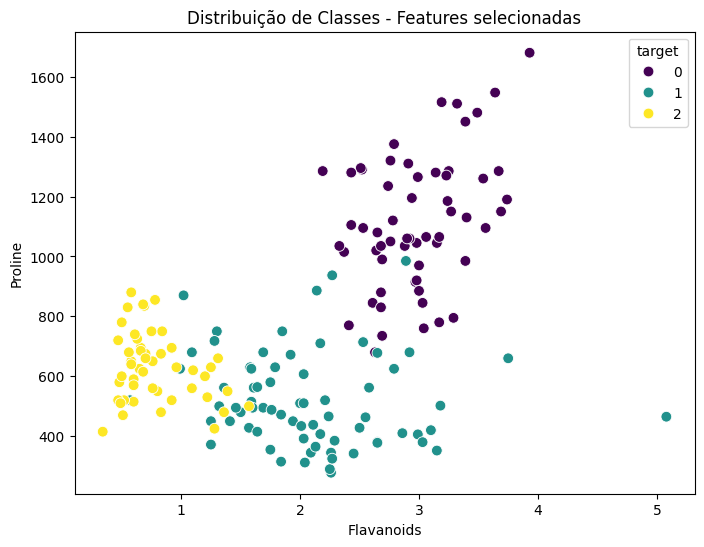

In [ ]:
# 2.2 Selecione as duas melhores features para visualização (analise correlações, variâncias, etc.)

# Usar visualização para decidir:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot entre duas features candidatas:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='flavanoids', y='proline',
    hue='target', palette='viridis',
    data=df_wine, s=60
)
plt.title("Distribuição de Classes - Features selecionadas")
plt.xlabel("Flavanoids")
plt.ylabel("Proline")
plt.show()

# Seleção final das features:
X_selected = df_wine[['flavanoids', 'proline']].values


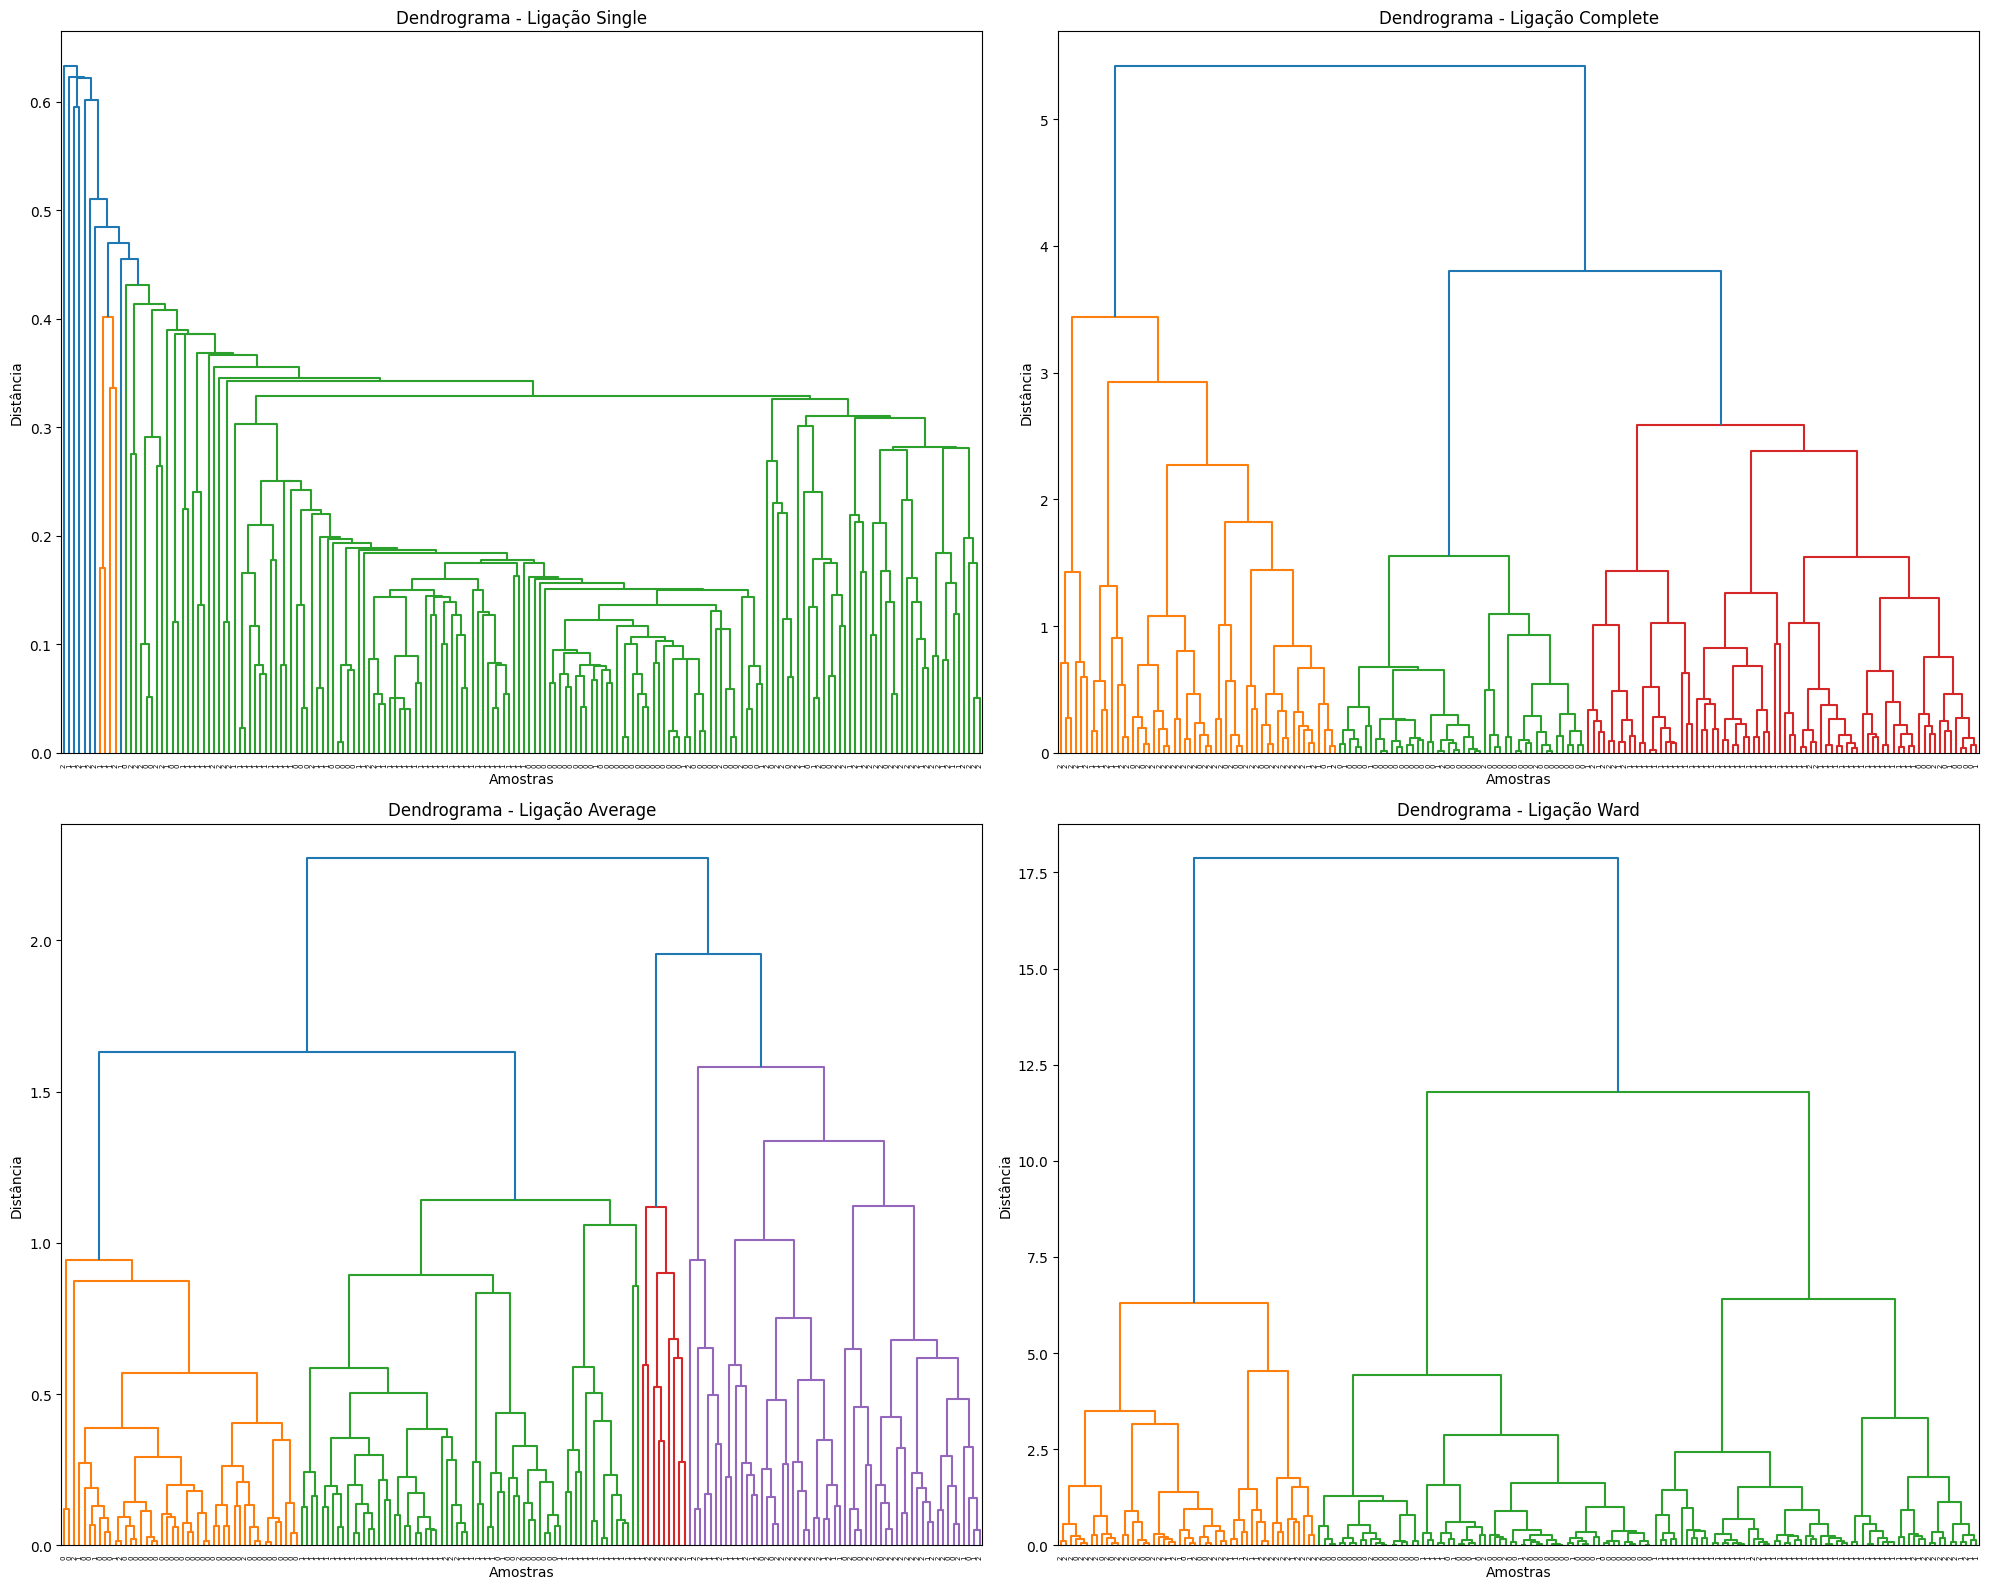

In [ ]:
# 2.3  Aplique os 4 métodos de ligação ('single', 'complete', 'average', 'ward') usando scipy.cluster.hierarchy.linkage e
# 2.4 Crie dendrogramas para cada método.

from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Carregar o dataset Wine:
wine = load_wine()
X = wine.data       # Dados
y_wine = wine.target  # Rótulos

# Selecionar duas features para visualização (exemplo: 'alcohol' e 'malic_acid'):
X_selecionado = X[:, [0, 1]]  # colunas 0 e 1

# Lista dos métodos de ligação:
metodos_ligacao = ['single', 'complete', 'average', 'ward']

# Criar uma figura com subplots:
figura, eixos = plt.subplots(2, 2, figsize=(20, 16))
eixos = eixos.ravel()

for i, metodo in enumerate(metodos_ligacao):
    # Calcular a matriz de ligação:
    Z = linkage(X_selecionado, method=metodo)

    # Criar dendrograma:
    dendrogram(
        Z,
        ax=eixos[i],
        labels=y_wine,  # rótulos das classes
        leaf_rotation=90  # rotacionar os rótulos para melhor visualização
    )

    # Títulos e legendas em português:
    eixos[i].set_title(f'Dendrograma - Ligação {metodo.capitalize()}')
    eixos[i].set_xlabel('Amostras')
    eixos[i].set_ylabel('Distância')

# Ajustar layout:
plt.tight_layout()
plt.show()




In [ ]:
# 2.5 Determine visualmente qual método produz a melhor separação:
#  O método que apresentou a melhor separação foi o Ward (produziu uma separação mais clara das três classes).

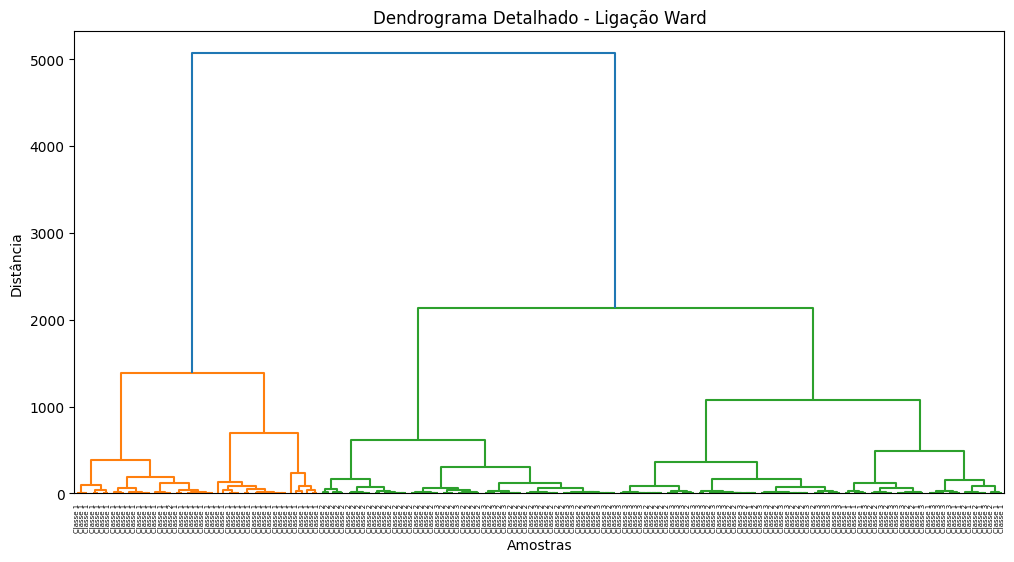

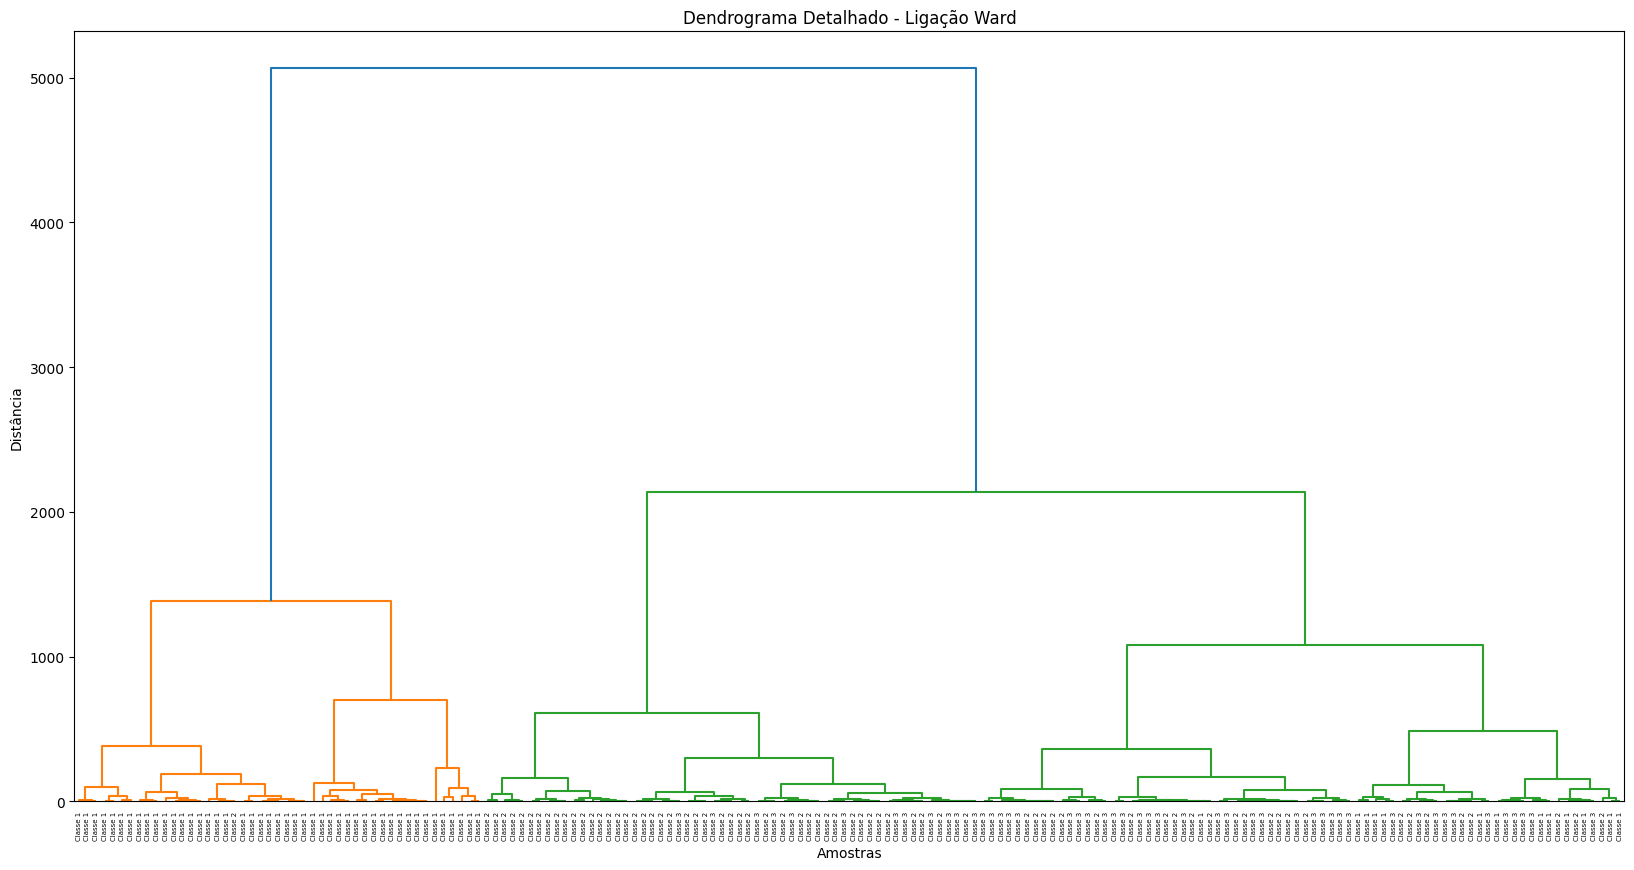

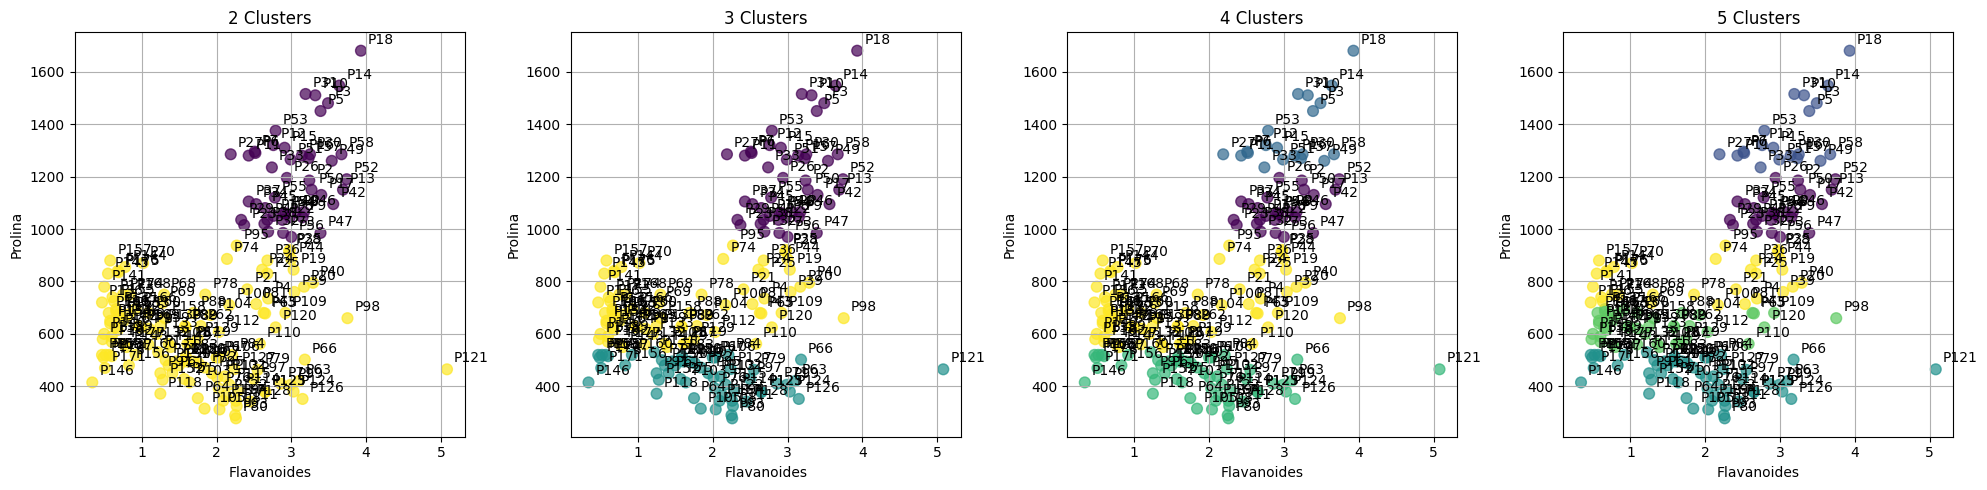

In [ ]:
# Exercício 3: Determinação do Número Ótimo de Clusters

from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset Wine:
dados = load_wine()
X = dados.data
rotulos_reais = dados.target

# Selecionar as duas melhores features (Flavanoides = índice 6, Prolina = índice 12):
X_selecionado = X[:, [6, 12]]
rotulos_wine = np.array(['Classe 1', 'Classe 2', 'Classe 3'])[rotulos_reais]

# 3.1 Use o melhor método do exercício anterior (Exercício 2):
melhor_metodo = 'ward'

# 3. 2  Crie Dendrograma com diferentes linhas de corte:
Z = linkage(X_selecionado, method=melhor_metodo)

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    labels=rotulos_wine,
    leaf_rotation=90,
    color_threshold=None
)
plt.title(f'Dendrograma Detalhado - Ligação {melhor_metodo.capitalize()}')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

# 3.2  Crie Dendrograma com diferentes linhas de corte:
Z = linkage(X_selecionado, method=melhor_metodo)

plt.figure(figsize=(20, 10))
dendrogram(
    Z,
    labels=rotulos_wine,
    leaf_rotation=90,
    color_threshold=None
)
plt.title(f'Dendrograma Detalhado - Ligação {melhor_metodo.capitalize()}')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

# 3.3 Teste diferentes números de clusters (2, 3, 4, 5) usando fcluster:
numeros_clusters = [2, 3, 4, 5]

figura, eixos = plt.subplots(1, len(numeros_clusters), figsize=(20, 5))

for i, n_clusters in enumerate(numeros_clusters):
# Criar clusters a partir do dendrograma
    clusters = fcluster(Z, n_clusters, criterion='maxclust')

# 3.4 Para cada número de clusters, visualize os clusters no scatter plot:
# Scatter plot dos clusters
    eixos[i].scatter(
        X_selecionado[:, 0],
        X_selecionado[:, 1],
        c=clusters,
        s=60,
        cmap='viridis',
        alpha=0.7
    )

# Adicionar rótulos das amostras
    for j, (x, y) in enumerate(X_selecionado):
        eixos[i].annotate(f'P{j}', (x, y), xytext=(5, 5), textcoords='offset points')

    eixos[i].set_title(f'{n_clusters} Clusters')
    eixos[i].set_xlabel('Flavanoides')
    eixos[i].set_ylabel('Prolina')
    eixos[i].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# 3.5  Determine o número ótimo de clusters justificando sua escolha
#    O número ótimo de clusters considerando o linkage WARD e as duas features selecionadas, é 3 e nesse caso (Wine), o dendrograma mostra um salto grande antes de formar 3 clusters, sugerindo que 3 clusters é uma escolha natural.
#    Além disso, o dataset possui 3 classes reais e o dendrograma também indica três grupos separados, então os clusters devem coincidir com essas classes.
